# SVM Implementation

### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
import seaborn as sns

### Import Dataset

In [2]:
datasets = pd.read_csv('Social_Network_Ads.csv')
datasets.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


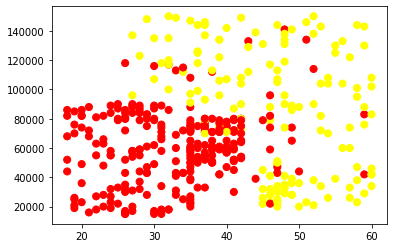

In [3]:
plt.scatter(datasets['Age'],datasets['EstimatedSalary'], c=datasets['Purchased'], s=50, cmap='autumn')

### Split dataset into training and testing data

In [4]:
X = datasets.iloc[:, 2:4].values
Y = datasets.iloc[:, 4].values
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

### Scale the data

In [5]:
sc_X = StandardScaler()
X_Train = sc_X.fit_transform(X_Train)
X_Test = sc_X.transform(X_Test)

### Load the SVM and train 

In [6]:
svc = SVC(kernel='linear').fit(X_Train, Y_Train)
rbf_svc = SVC(kernel='rbf', gamma=0.7).fit(X_Train, Y_Train)
poly_svc = SVC(kernel='poly', degree=3).fit(X_Train, Y_Train)

### Predict on test data

In [7]:
Y_Pred_Linear = svc.predict(X_Test)
Y_Pred_RBF = rbf_svc.predict(X_Test)
Y_Pred_Polynomial = poly_svc.predict(X_Test)

### Confusion Matrix - Linear Kernel

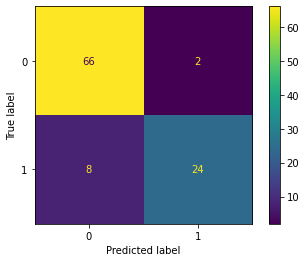

In [8]:
confusionMatrix = plot_confusion_matrix(svc,X_Test, Y_Test)

### Confusion Matrix - RBF Kernel

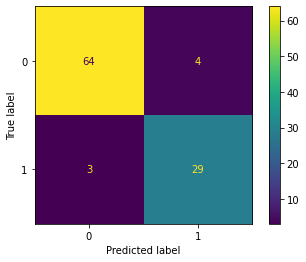

In [9]:
confusionMatrix = plot_confusion_matrix(rbf_svc,X_Test, Y_Test)

### Confusion Matrix - Polynomial Kernel

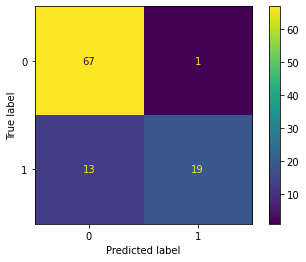

In [10]:
confusionMatrix = plot_confusion_matrix(poly_svc,X_Test, Y_Test)

### Classification Report - Linear Kernel

<AxesSubplot:>

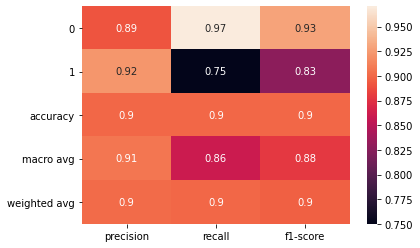

In [11]:
classificationReport = classification_report(Y_Test, Y_Pred_Linear,output_dict=True)
sns.heatmap(pd.DataFrame(classificationReport).iloc[:-1, :].T, annot=True)

### Classification Report - RBF Kernel

<AxesSubplot:>

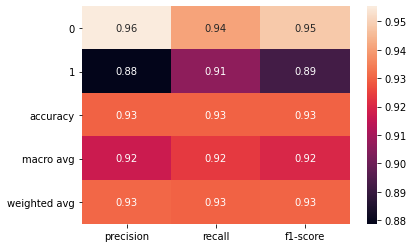

In [12]:
classificationReport = classification_report(Y_Test, Y_Pred_RBF,output_dict=True)
sns.heatmap(pd.DataFrame(classificationReport).iloc[:-1, :].T, annot=True)

### Classification Report - Polynomial Kernel

<AxesSubplot:>

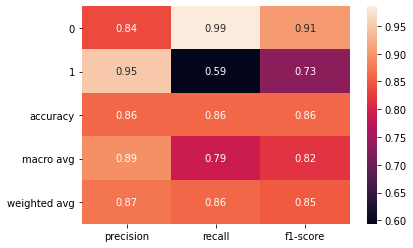

In [13]:
classificationReport = classification_report(Y_Test, Y_Pred_Polynomial,output_dict=True)
sns.heatmap(pd.DataFrame(classificationReport).iloc[:-1, :].T, annot=True)

### Visualise Decision Boundary

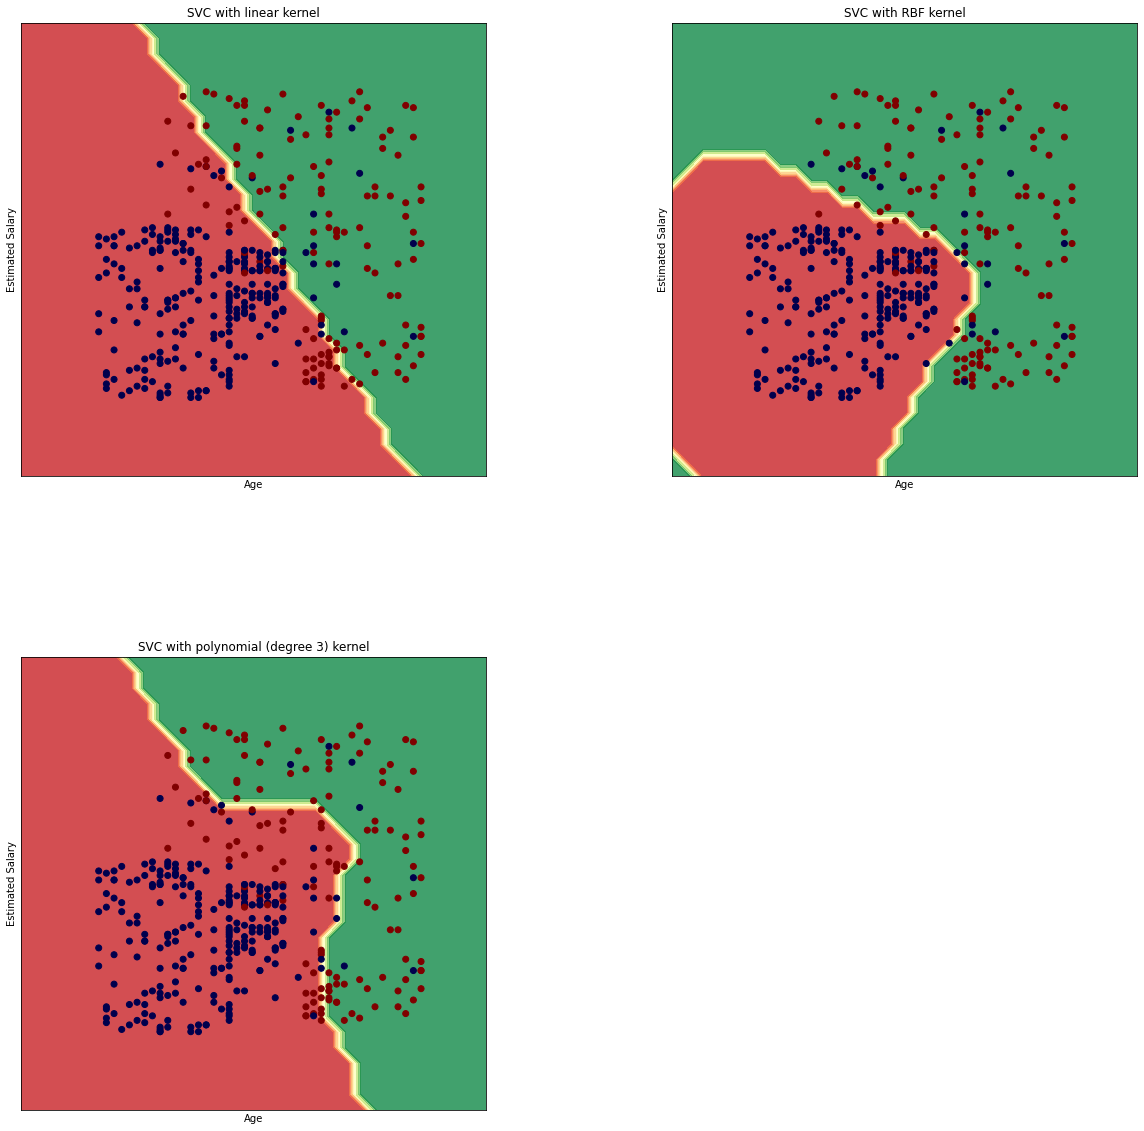

In [25]:
X = sc_X.transform(datasets.iloc[:, 2:4].values)
y = datasets.iloc[:,4]
plt.rcParams["figure.figsize"] = (20,20)

# create a mesh to plot in
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2),
                     np.arange(y_min, y_max, 0.2))

# title for the plots
titles = ['SVC with linear kernel',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']


for i, clf in enumerate((svc, rbf_svc, poly_svc)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlGn, alpha=0.8)

    # Plot also the training points
    
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.seismic)
    plt.xlabel('Age')
    plt.ylabel('Estimated Salary')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])

plt.show()